## Statistical Thinking in Python 2

**TOC**
* [Parameter Estimation by Optimization](#estimate)
* [Bootstrap Confidence Intervals](#bootstrap)
* [Hypothesis Testing](#hypothesis)
* [Hypothesis Test Examples](#examples)

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

sns.set()

### Parameter Estimation by Optimization <a class="anchor" id="estimate"/>
* Optimal Parameters
* Linear Regression
* EDA


In [13]:
# create a function to return CDF axis
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [42]:
# read all the data necessary
speed_of_light = pd.read_csv('datasets/speed_of_light.csv', index_col=0)
no_hitters = pd.read_csv('datasets/major_league_baseball_no_hitters.csv')
swing_states = pd.read_csv('datasets/swing_states.csv')
female_literacy = pd.read_csv('datasets/female_literacy.csv')

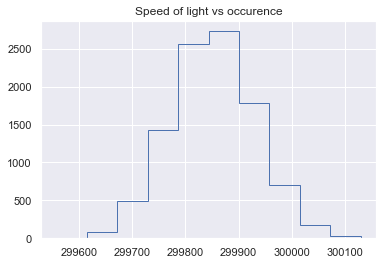

In [14]:
# checking nornmality
mean = np.mean(speed_of_light['velocity of light in air (km/s)'])
std = np.std(speed_of_light['velocity of light in air (km/s)'])
samples = np.random.normal(mean, std, size=10000)

plt.title('Speed of light vs occurence')
plt.hist(samples, histtype='step')
plt.show()

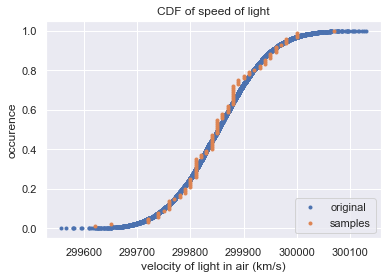

In [20]:
# show CDF 
x, y = ecdf(samples)
x_theor, y_theor = ecdf(speed_of_light['velocity of light in air (km/s)'])

plt.title('CDF of speed of light')
plt.plot(x, y, linestyle='none', marker='.', label='original')
plt.plot(x_theor, y_theor, linestyle='none', marker='.', label='samples')
plt.xlabel('velocity of light in air (km/s)')
plt.ylabel('occurence')
plt.legend(loc=4)
plt.show()

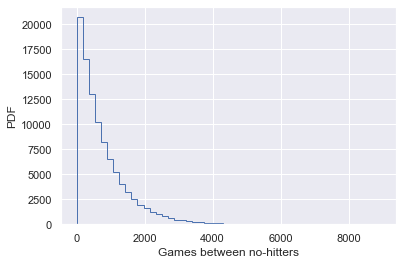

In [26]:
# no-hitters example
nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, size=100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

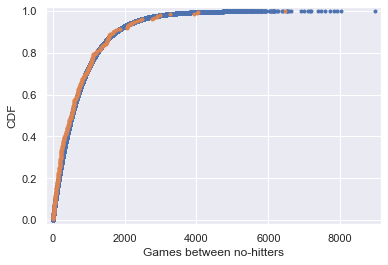

In [27]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

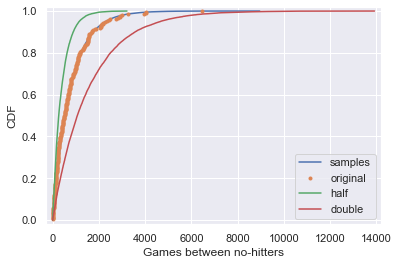

In [29]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor, label='samples')
plt.plot(x, y, marker='.', linestyle='none', label='original')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau / 2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau * 2, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, label='half')
_ = plt.plot(x_double, y_double, label='double')

# Show the plot
plt.legend(loc=4)
plt.show()

In [41]:
# show slope and intercept
total_votes = swing_states['total_votes']
dem_share = swing_states['dem_share']

slope, intercept = np.polyfit(total_votes, dem_share, 1)
print(f'Slope: {round(slope, 5)}, Intercept: {round(intercept, 3)}')

Slope: 4e-05, Intercept: 40.114


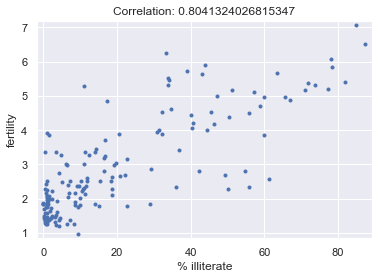

In [48]:
# show the regression and pearson correlation 
literacy = female_literacy['female literacy']    # get the literacy column and take its inverse
illiteracy = np.abs(literacy - 100)

fertility = female_literacy['fertility']         # get fertility column
corr = np.corrcoef(illiteracy, fertility)[0, 1]  # get the correlation coefficient 

# show correlation and plot 
plt.title(f'Correlation: {corr}')
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02) # set margins
plt.xlabel('% illiterate')
plt.ylabel('fertility')
plt.show()

slope = 0.049798548090634255 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


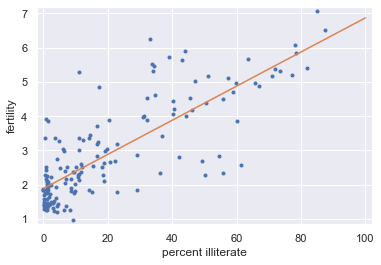

In [49]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


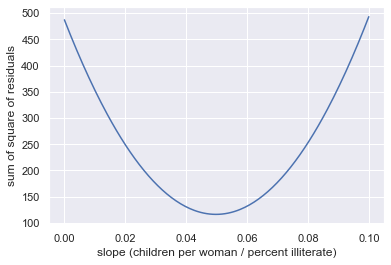

In [50]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## Bootstrap Confidence Intervals <a class="anchor" id="bootstrap"/>
* Generate bootstrap replicates
* Visualizing samples
* Confidence interval
* Pairs bootstrap

In [ ]:
# generate bootstrap replicates
